In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import datetime
from pandas_datareader.data import DataReader
import kagglegym
with pd.HDFStore("../input/train.h5", "r") as train:
    # Note that the "train" dataframe is the only dataframe in the file
    df = train.get("train")

In [4]:
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

with pd.HDFStore('../input/train.h5') as train:
    df = train.get('train')

In [6]:
market_df = df[['timestamp', 'y']].groupby('timestamp').agg([np.mean, np.std, len]).reset_index()
market_df.head()

timestamp         y                 
                 mean       std    len
0         0 -0.001870  0.026646  750.0
1         1  0.000501  0.028422  750.0
2         2 -0.005787  0.029281  750.0
3         3  0.001633  0.025333  750.0
4         4 -0.004309  0.035929  750.0

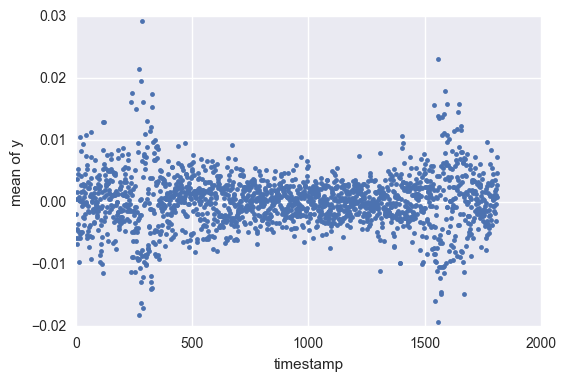

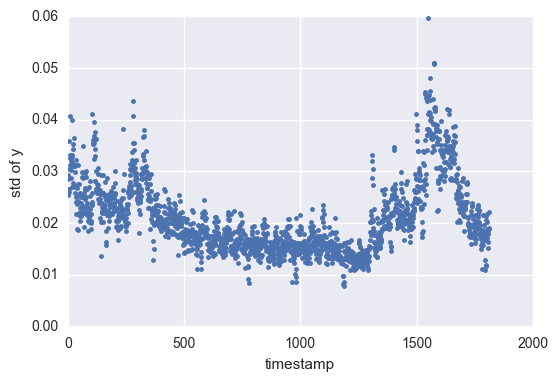

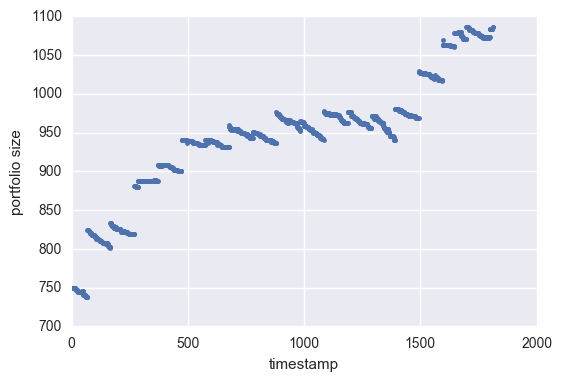

In [7]:
t      = market_df['timestamp']
y_mean = np.array(market_df['y']['mean'])
y_std  = np.array(market_df['y']['std'])
n      = np.array(market_df['y']['len'])

plt.figure()
plt.plot(t, y_mean, '.')
plt.xlabel('timestamp')
plt.ylabel('mean of y')

plt.figure()
plt.plot(t, y_std, '.')
plt.xlabel('timestamp')
plt.ylabel('std of y')

plt.figure()
plt.plot(t, n, '.')
plt.xlabel('timestamp')
plt.ylabel('portfolio size')

In [8]:
simple_ret = y_mean # this is a vector of the mean of asset returns for each timestamp
cum_ret = np.log(1+simple_ret).cumsum()

In [9]:
portfolio_mean = np.mean(cum_ret)
portfolio_std = np.std(cum_ret)
print("portfolio mean periodic return: " + str(portfolio_mean))
print("portfolio std dev of periodic returns: " + str(portfolio_std))

portfolio mean periodic return: 0.183126
portfolio std dev of periodic returns: 0.0922067


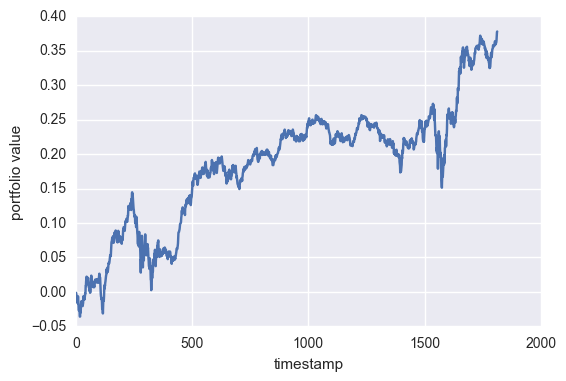

In [10]:
plt.figure()
plt.plot(t, cum_ret)
plt.xlabel('timestamp')
plt.ylabel('portfolio value')

In [11]:
start = datetime.datetime(2016, 2, 1)
end = datetime.datetime(2016, 7, 21)
ndaq = DataReader("NDAQ", "yahoo", start, end)
sp=DataReader("^GSPC","yahoo",start,end)
dow=DataReader("^DJI","yahoo",start,end)

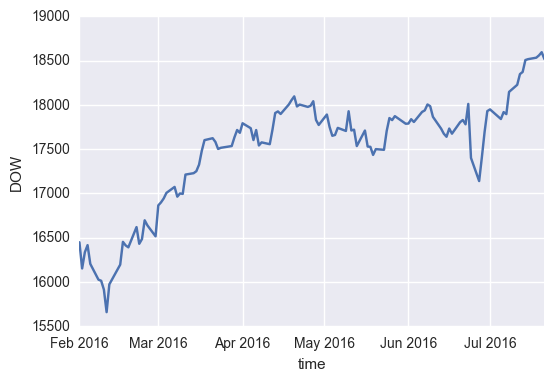

In [12]:
plt.figure()
plt.plot(dow.Close)
plt.xlabel('time')
plt.ylabel('DOW')

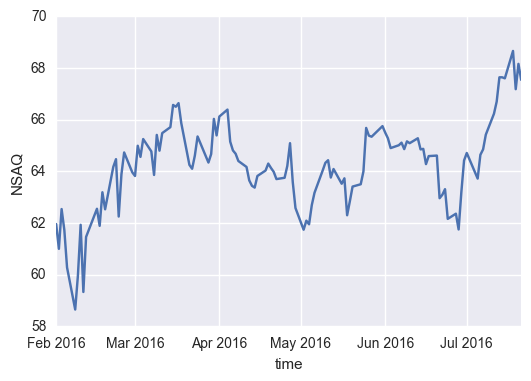

In [13]:
plt.figure()
plt.plot(ndaq.Open)
plt.xlabel('time')
plt.ylabel('NSAQ')

In [14]:
print(len(cum_ret))
print(len(ndaq))
print(len(ndaq.Close))

1813
120
120


In [15]:
newCumRet=cum_ret[range(0,120*15,15)]
len(newCumRet)

120

In [16]:
np.corrcoef(newCumRet,ndaq.Close)

array([[ 1.        ,  0.53716456],
       [ 0.53716456,  1.        ]])

In [17]:
np.corrcoef(newCumRet,sp.Close)

array([[ 1.        ,  0.88949526],
       [ 0.88949526,  1.        ]])

In [18]:
np.corrcoef(newCumRet,dow.Close)

array([[ 1.        ,  0.89328422],
       [ 0.89328422,  1.        ]])

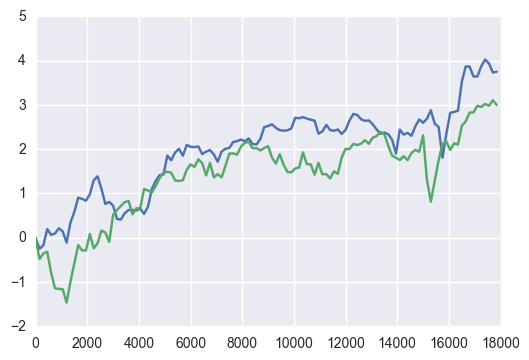

In [19]:
plt.figure
plt.plot(range(0,120*150,150),(newCumRet-newCumRet[0])/std(newCumRet),range(0,120*150,150),
         (sp.Close-sp.Close[0])/std(sp.Close))

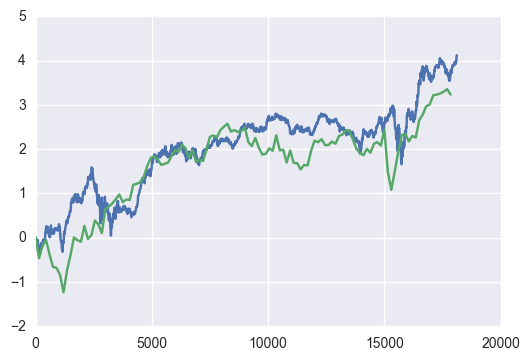

In [20]:
plt.figure
plt.plot(range(0,1813*10,10),(cum_ret-cum_ret[0])/std(cum_ret),range(0,120*150,150),
         (dow.Close-dow.Close[0])/std(dow.Close))

In [21]:
xmean_df = {}
x_ids = df.columns[:]
for i in x_ids[2:]:
    xmean_df[i] = df[['timestamp', i]].groupby('timestamp').agg([np.mean, np.std, len]).reset_index()

In [23]:
xmean_df['y'].head()
type(xmean_df)
type(xmean_df['y'])

pandas.core.frame.DataFrame

In [119]:
select_xmean = {}
for col in xmean_df:
    select_xmean[col] = xmean_df[col][xmean_df[col]['timestamp'] % 8 == 1][:216]
    #first choose every 8th element, and choose the first 216

In [120]:
select_xmean['derived_0']['derived_0']['mean'].head()

1     0.038036
9     0.036114
17    0.035848
25    0.048110
33    0.046311
Name: mean, dtype: float32

In [121]:
xmean_f = {}
for col in select_xmean:
    xmean_f[col] = select_xmean[col][col]['mean']

xmean_df = pd.DataFrame(xmean_f)
xmean_df.head()

,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_10,fundamental_11,fundamental_12,...,technical_40,technical_41,technical_42,technical_43,technical_44,technical_5,technical_6,technical_7,technical_9,y
1,0.038036,0.220014,0.779802,-0.038055,0.081712,0.023748,0.099712,0.283453,-0.832842,13.218588,...,-0.005988,NaN,NaN,-1.134048,NaN,NaN,-1.211230,0.007439,NaN,0.000501
9,0.036114,0.227041,0.833339,0.027531,0.083785,0.025039,0.098713,0.369871,-1.265294,13.719002,...,-0.000857,NaN,NaN,-1.134048,NaN,NaN,-1.211230,0.006566,NaN,0.004594
17,0.035848,0.229702,0.817389,0.123793,0.085169,0.026242,0.097641,0.394619,-1.199187,13.905354,...,0.001758,NaN,NaN,-1.153700,NaN,NaN,-1.234515,0.007443,NaN,-0.005068
25,0.048110,0.257971,0.794951,0.477069,0.087745,0.028248,0.098348,0.389281,-0.488364,14.173619,...,0.002468,0.006270,0.000000,-1.252309,NaN,NaN,-1.347655,0.006461,-0.014805,-0.004816
33,0.046311,0.242094,0.737433,0.555012,0.092428,0.028952,0.098295,0.374997,-0.572071,14.381191,...,0.004489,0.006435,-0.010667,-1.282313,NaN,NaN,-1.363684,0.005683,-0.013522,-0.003709


In [122]:
dow['Adj Close'].values

array([ 15801.790039,  15994.769531,  15963.94043 ,  16027.589844,
        16154.389648,  16130.400391,  16040.55957 ,  16133.230469,
        16103.299805,  16207.139648,  16179.660156,  16198.410156,
        16272.650391,  16321.709961,  16168.030273,  16395.880859,
        16360.179688,  16421.890625,  16452.720703,  16418.679688,
        16351.25    ,  16340.080078,  16108.889648,  16065.669922,
        16247.219727,  16336.19043 ,  16222.169922,  16331.049805,
        16302.769531,  16276.69043 ,  16367.879883,  16268.990234,
        16264.230469,  16323.05957 ,  16457.660156,  16532.609375,
        16573.      ,  16572.550781,  16412.710938,  16245.870117,
        16256.139648,  16437.179688,  16170.219727,  16026.75    ,
        16173.240234,  16262.55957 ,  16424.849609,  16408.539062,
        16449.25    ,  16514.369141,  16501.650391,  16501.650391,
        16361.459961,  16448.740234,  16535.369141,  16580.839844,
        16558.869141,  16512.890625,  16530.550781,  16401.019

In [148]:
dow['Adj Close'].values[215]

17068.869140999999

In [158]:
dow_return = np.zeros(216)
dow_return[0] = 0
for i in range(1,215):
    dow_return[i] = (dow['Adj Close'].values[i] - dow['Adj Close'].values[i-1])/(dow['Adj Close'].values[i-1])


In [161]:
dow_return.mean()

0.00040776788346651551

In [162]:
xmean_df['Dow'] = dow['Adj Close'].values
xmean_df['Dow_return'] = dow_return
##no need to add "()" to values here 

# start = datetime.datetime(2014, 2, 10)
# end = datetime.datetime(2014, 12, 16)
# ndaq = DataReader("NDAQ", "yahoo", start, end)
# sp=DataReader("^GSPC","yahoo",start,end)
# dow=DataReader("^DJI","yahoo",start,end)

xmean_df.head()

,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_10,fundamental_11,fundamental_12,...,technical_42,technical_43,technical_44,technical_5,technical_6,technical_7,technical_9,y,Dow,Dow_return
1,0.038036,0.220014,0.779802,-0.038055,0.081712,0.023748,0.099712,0.283453,-0.832842,13.218588,...,NaN,-1.134048,NaN,NaN,-1.211230,0.007439,NaN,0.000501,15801.790039,0.000000
9,0.036114,0.227041,0.833339,0.027531,0.083785,0.025039,0.098713,0.369871,-1.265294,13.719002,...,NaN,-1.134048,NaN,NaN,-1.211230,0.006566,NaN,0.004594,15994.769531,0.012213
17,0.035848,0.229702,0.817389,0.123793,0.085169,0.026242,0.097641,0.394619,-1.199187,13.905354,...,NaN,-1.153700,NaN,NaN,-1.234515,0.007443,NaN,-0.005068,15963.940430,-0.001927
25,0.048110,0.257971,0.794951,0.477069,0.087745,0.028248,0.098348,0.389281,-0.488364,14.173619,...,0.000000,-1.252309,NaN,NaN,-1.347655,0.006461,-0.014805,-0.004816,16027.589844,0.003987
33,0.046311,0.242094,0.737433,0.555012,0.092428,0.028952,0.098295,0.374997,-0.572071,14.381191,...,-0.010667,-1.282313,NaN,NaN,-1.363684,0.005683,-0.013522,-0.003709,16154.389648,0.007911


In [163]:
xdow_corr = xmean_df.corr(method='pearson', min_periods=1)
xdow_corr.to_csv('x_dow_corr.csv')

In [84]:
print(select_xmean.keys()) ## .keys() is a function that returns the names of available indices within the dictionary

dict_keys(['technical_5', 'fundamental_28', 'technical_24', 'technical_14', 'fundamental_45', 'fundamental_6', 'fundamental_20', 'fundamental_24', 'technical_41', 'technical_44', 'fundamental_51', 'fundamental_52', 'fundamental_34', 'fundamental_44', 'technical_19', 'fundamental_2', 'technical_21', 'technical_30', 'fundamental_8', 'fundamental_36', 'fundamental_63', 'fundamental_18', 'fundamental_12', 'fundamental_23', 'technical_37', 'technical_10', 'fundamental_21', 'derived_0', 'fundamental_26', 'technical_39', 'fundamental_62', 'fundamental_39', 'derived_2', 'technical_28', 'fundamental_1', 'fundamental_27', 'fundamental_59', 'fundamental_50', 'technical_2', 'fundamental_55', 'technical_12', 'fundamental_49', 'technical_3', 'fundamental_0', 'fundamental_58', 'fundamental_3', 'technical_13', 'fundamental_60', 'technical_22', 'technical_29', 'fundamental_38', 'derived_4', 'fundamental_53', 'technical_9', 'fundamental_41', 'technical_18', 'technical_36', 'fundamental_57', 'fundamental